# MCT4001 Scientific Computing in Python Session 12
![mct-banner](https://raw.githubusercontent.com/wiki/MCT-master/Guides/assets/img/mct-banner.jpg)

## Running Python in different environments

This is a simple program we will try to run in different environments. The program print data on screen, creates a plot and playback some audio (offline, i.e. after the sound array has been generated and in "blocking" fashion, i.e. the program execution holds until audio playback completes), which is generally what we have been doing so far.

Utilities included in the IPython package (such as the audio player widget) works only in [IPython](https://en.wikipedia.org/wiki/IPython) and its extensions, such as the Jupiter Notebook. Since we want to run this program also elsewhere, we wont use the the IPython package to playbakc audio but the sounddevice package. Plots (matplotlib) and print can be also rendered outside Ipython (so we will stick to them).

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 

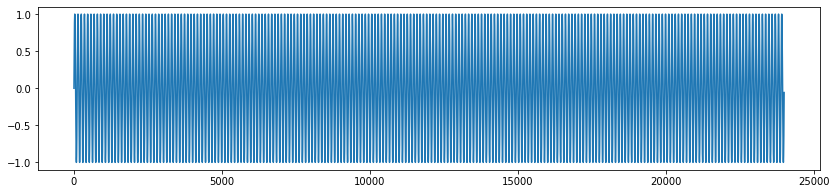


done!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd


def sine_synth(freq, dur_ms, amp=1, pha=0, sr=48000):

    t = np.arange(0,dur_ms/1000,1/sr)
    s = amp*np.sin(2*np.pi*freq*t+pha)
    
    return s

for i in range(200):
    print(i,end=' ')

signal = sine_synth(440, 500)

plt.figure(figsize=(14, 3))
plt.plot(signal)
plt.show()

sd.play(signal,48000)
sd.wait()

print('\ndone!')


## Other things that do not work in outside Jupiter Notebook

* the so called magic ommands (starts with % in jupiter notebook) will obviously not work

* you can not run terminal commands in just by typing them (such as "ls", "cd ...", or pip install ...") you can still so that by using the package "os" (in particular the method os.system() )

* you need to ensure that you plt.show() your plot.

* when displaying images or playback audio you need to ensure that you handle properly the "blocking" of the program until the displaying process is over (user terminator, or timeout).

* in Jupiter Notebook multiple cells are part of the same context, so the object you create in a cell are available for any other cell you run (unless explicitly deleted, or if you clear and restart the kernel). In ther environment everytime your script terminates, all objects are deleted (i.e. you need to run everything you need ina single shot, or save data to file, perhaps using the [joblib package](https://joblib.readthedocs.io/en/latest/persistence.html#persistence-in-file-objects))

## Python environments

Python environments are extremely handy to create and maitain multiple working framework on a single machine (each framework has its own Python version and specific collection and versions of of packages).

When working in Python is always recommended to use a virtual environment and do not mess up the native/basic python installation which may also be used by the Operating System and other software.

[Conda](https://docs.conda.io/projects/conda/en/latest/) and [Virtualenv](https://docs.python.org/3/tutorial/venv.html) are the most popular and easy to use choices for creating and managing Python virtual environment. Both works from command line. In general *pip* is recommended for installing packages (there are more than in conda install).

If you have a conda installation (you do if you installed anaconda navigator) you can select and run the right environment from the GUI or from the terminal. Useful commands ae:
- conda info --envs
- conda activate *path_to_env*


## Other enviroments we will explore

* Python command-line interpreter

* Plain text editor & terminal

* Online suing services such as https://replit.com

* Spider, an IDE for Python (#%% for cell separation)

* Pycharm, a text exitor with IDE functionalites for Python

## Main function
in most compiled programming languages it is a must to define a main() function. This represents the entry point or beginning of our proram. Most scripting languages do not require a main function, although it can be specified. This is very useful when importing classes and/or functions defined in a separate file. For more details you can read [here](https://realpython.com/python-main-function/) and [here](https://www.guru99.com/learn-python-main-function-with-examples-understand-main.html). If you want to learn more about entry points in python, you can read [here](https://amir.rachum.com/blog/2017/07/28/python-entry-points/) (this is an advanced topic, it can be complicated to digest, skip it if you are a beginner).

## Command line arguments
It is also possible to pass arguments to Python scripts via command line. To learn more about this, read [here](https://www.tutorialspoint.com/python/python_command_line_arguments.htm).